In [1]:
from IPython import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
# np.set_printoptions(threshold=sys.maxsize)

# Introduction
- <b>Machine Learning (ML)</b> is a means of building <b>mathematical models</b> to help understand data.
- Models built <b>learn from given data (training data)</b>, which can be used to <b>predict and understand newly observed data.</b>
- ML is regarded as <b>a part of artificial intelligence (AI)</b>.
- It is widely used in applications such as <b>computer vision, fraud detection, medical diagnosis, etc.</b>
<br>

In general, there are three categories of ML: <b>Supervised Learning, Unsupervised Learning and Reinforcement Learning</b>.

## Supervised Learning
- It models the relationship betweem features and labels/values of data.
- There are two subdivsions of tasks: <b>classification</b> and <b>regression</b>.
- Classification deals with discrete labels (e.g. classify between dog and cat), while regression deals with continuous quantities (e.g. stock price over time).
- Applications include <b>medical imaging to detect cancer spots, speech recognition, stock price prediction</b>, etc.

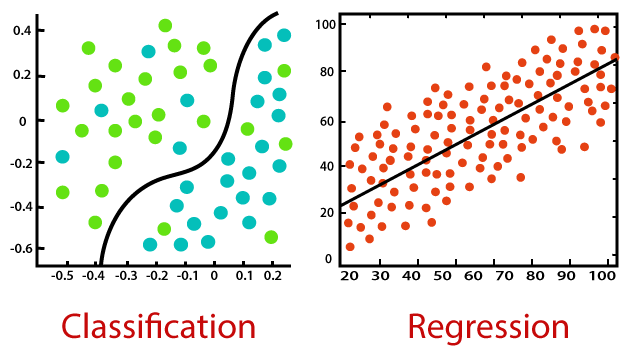

In [2]:
display.Image('img/1_supervised_learning.png', width=400)

## Unsupervised Learning
- It models features of data without referring to any assigned labels/values of the features.
- Rather than telling exactly which data point corresponds to a label/value, it tells the relationship (e.g. similarity  according to some defined distance) between data points.
- Common approaches include <b>clustering</b> and <b>dimensionality reduction</b>.
- Applications include <b>customer segmentation, fraud detection in financial transactions, recommendation system in Netflix</b>, etc.

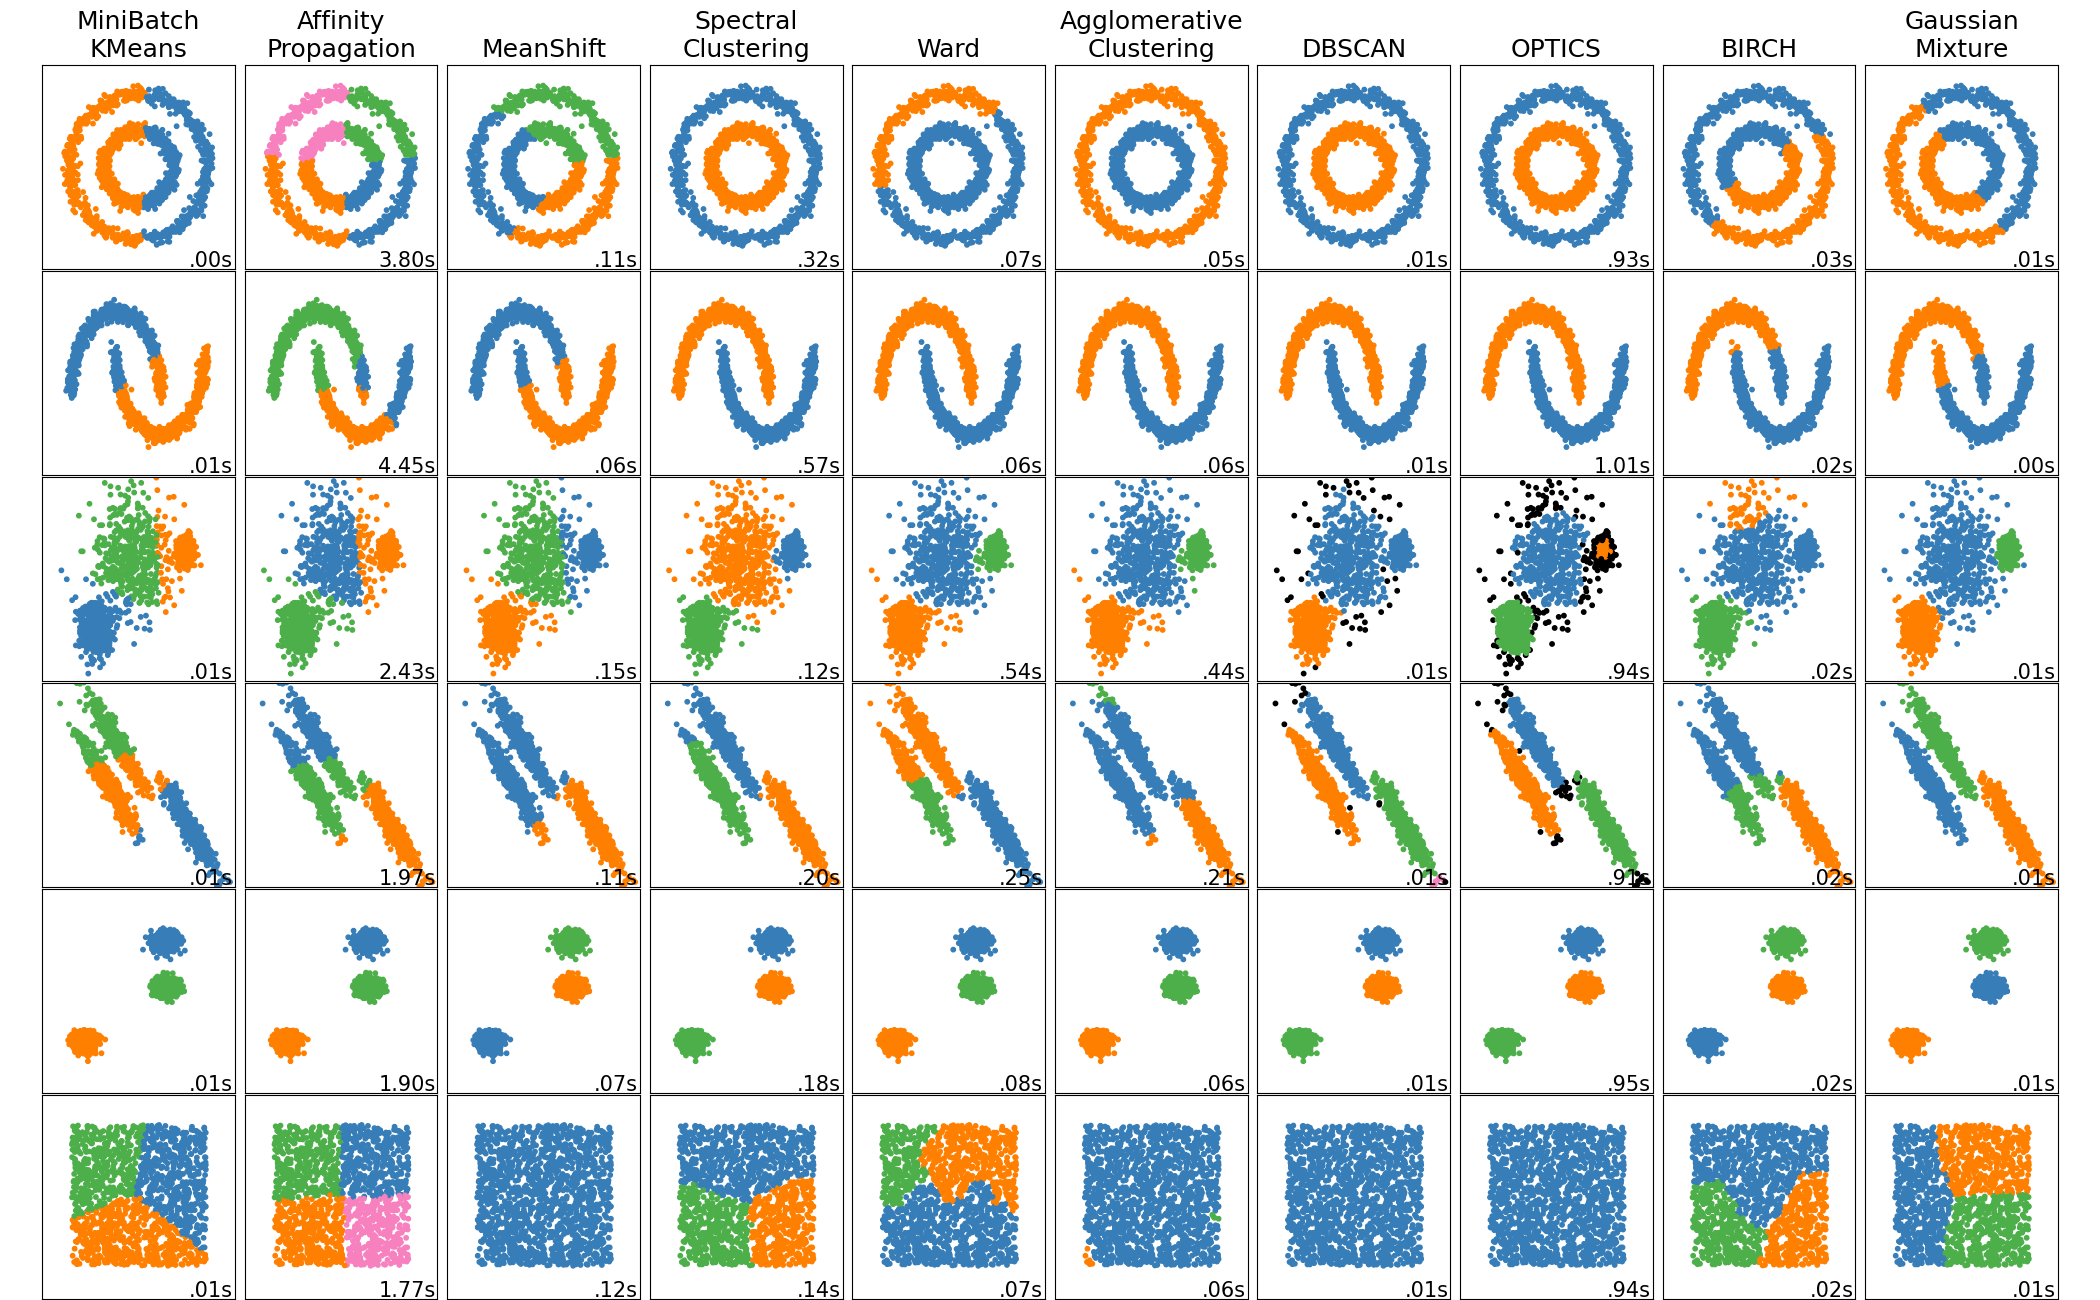

In [3]:
display.Image('img/1_clustering.png', width=700)

## Reinforcement Learning
- It refers to a ML method concerning how an intelligent agent (e.g. an algorithm) should <b>take actions</b> to <b>optimize cumulative reward</b> in a specific environment.
- The agent <b>evaluates a current situation, takes action and receives feedback after each act</b>. Positive feedback means a reward while negative feedback means a punishment.
- Examples include <b>gaming, autonomous driving, traffic light control</b>, etc

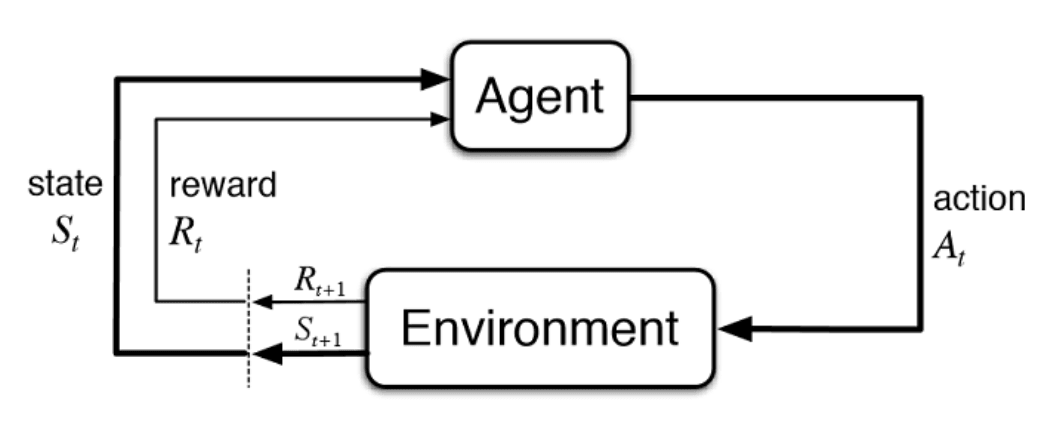

In [4]:
display.Image('img/1_reinforcement_learning.png', width=500)

For more descriptions and clarification of terms and algorithms in machine learning, please visit https://www.ibm.com/hk-en/cloud/learn/machine-learning.

# Feature Engineering
- It is an important step to <b>extract useful information</b> (get the most out of what you have) or <b>generate new features</b> (e.g. the ratio of two columns of features could generate a new meaning to a model) from raw data and <b>convert them in formats that can be fitted in machine learning algorithms</b>.
- It affects <b>model accuracy and computational time</b>.
- Raw data ususally consists of features of certain types, typcically it could be <b>numbers, categories (e.g. grades A,B,C,D), texts, image pixels</b>, etc
- For each type of feature, there are different ways for feature engineering, partially depends on the ML algorithm we use.

## Numerical Feature
- <b>Scaling</b> is required for ML algorithms that use <b>gradient descent</b> such as <b>linear regression, logistic regression and neural network</b>, in order to control the step size during optimization.
- Scaling is also important in <b>distance-based algorithms</b> such as <b>kNN, k-means and support vector machine</b> because distances between points determines classification result, so if scale in an axis is much higher than the other (e.g. one feature is GPA while the other is yearly income), the model will be biased to the feature with larger scale.
- On the other hand, <b>tree-bases algorithms</b> such as <b>decision tree, random forest and XGBoost</b> are <b>insensitive to the scale of features</b>.
- Two major ways for scaling: <b>normalization and standardization</b>

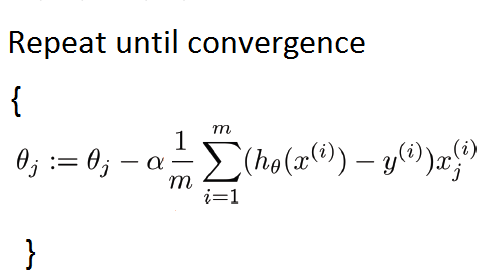

In [5]:
# why gradient descent need scaling
display.Image('img/1_gradient_descent.png', width=350)

In [6]:
str = [i for i in range(5)]
str

[0, 1, 2, 3, 4]

### Normalization
- The process of scaling a feature to have a unit norm (i.e. from 0 to 1)

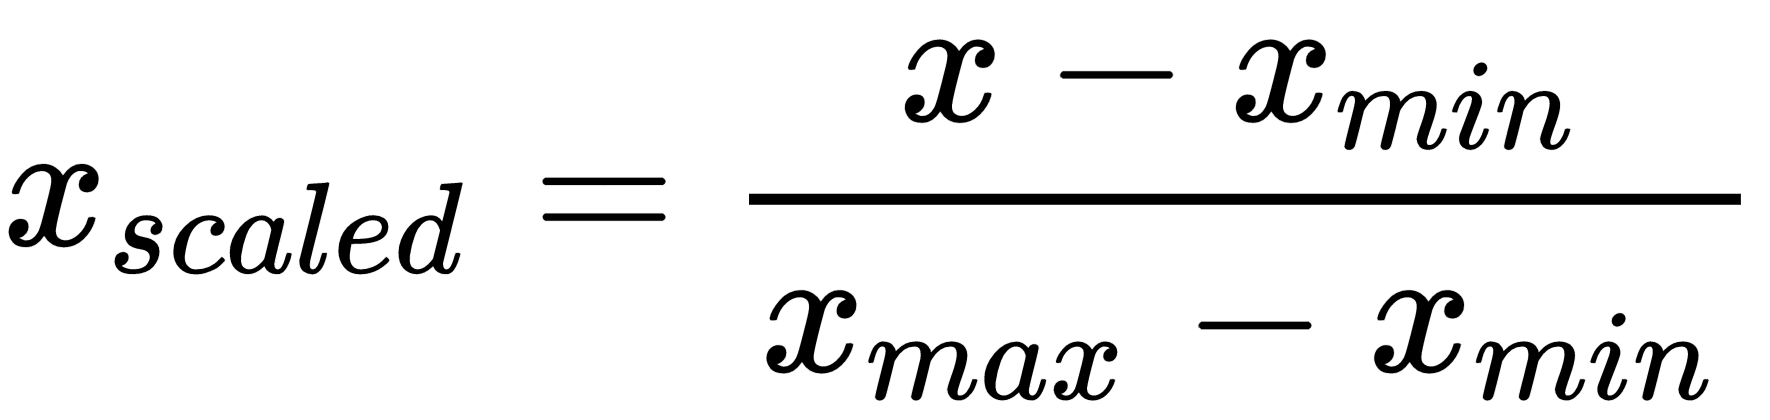

In [7]:
# formula for min-max scaling
display.Image('img/1_min_max_scaling.png', width=200)

In [8]:
# let's create a dummy dataset
from scipy.stats import skewnorm
df = pd.DataFrame({
    'Student': np.arange(1, 101), 
    'CGPA': [2*x for x in skewnorm.rvs(a=4, size=1000) if 0<=x<=2][:100],    # a is the skewness parameter, a=0 means normal distribution
    'Income': [round(abs(x), -2) for x in skewnorm.rvs(a=3, size=100)*10000]
})
df

,Student,CGPA,Income
0,1,0.019768,9200.0
1,2,1.957248,7800.0
2,3,2.399739,19600.0
3,4,0.426049,9700.0
4,5,0.213763,14100.0
...,...,...,...
95,96,2.035916,23500.0
96,97,1.476631,2700.0
97,98,2.391811,18000.0
98,99,3.987896,7600.0


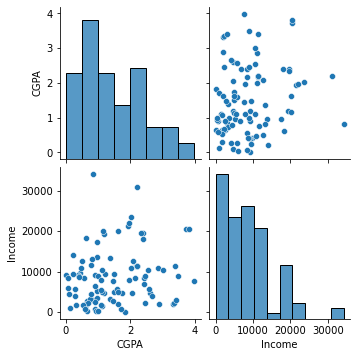

In [9]:
# distribution of original features
sns.pairplot(data=df[['CGPA', 'Income']]);

In [10]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df['CGPA_min_max'] = min_max_scaler.fit_transform(df['CGPA'].to_numpy().reshape(-1, 1))
df['Income_min_max'] = min_max_scaler.fit_transform(df['Income'].to_numpy().reshape(-1, 1))
df

,Student,CGPA,Income,CGPA_min_max,Income_min_max
0,1,0.019768,9200.0,0.000000,0.269006
1,2,1.957248,7800.0,0.488260,0.228070
2,3,2.399739,19600.0,0.599772,0.573099
3,4,0.426049,9700.0,0.102386,0.283626
4,5,0.213763,14100.0,0.048888,0.412281
...,...,...,...,...,...
95,96,2.035916,23500.0,0.508085,0.687135
96,97,1.476631,2700.0,0.367141,0.078947
97,98,2.391811,18000.0,0.597774,0.526316
98,99,3.987896,7600.0,1.000000,0.222222


### Standardization
- It transform the original data to mean=0 and standard deviation=1.
- It is used <b>when a model assumes a Gaussian distribution of data</b>, e.g. LDA (Linear Discriminant Analysis) and QDA (Quadratic Discirminant Analysis).

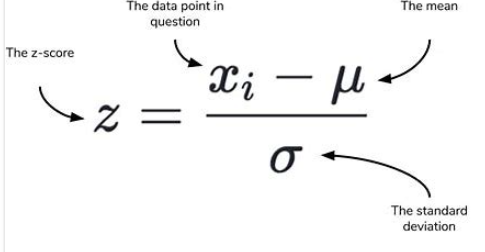

In [11]:
# formula for standardization
display.Image('img/1_z_score.png', width=200)

In [12]:
from sklearn import preprocessing
standard_scaler = preprocessing.StandardScaler()
df['CGPA_standard'] = standard_scaler.fit_transform(df['CGPA'].to_numpy().reshape(-1, 1))
df['Income_standard'] = standard_scaler.fit_transform(df['Income'].to_numpy().reshape(-1, 1))
df

,Student,CGPA,Income,CGPA_min_max,Income_min_max,CGPA_standard,Income_standard
0,1,0.019768,9200.0,0.000000,0.269006,-1.498460,0.089259
1,2,1.957248,7800.0,0.488260,0.228070,0.483714,-0.115598
2,3,2.399739,19600.0,0.599772,0.573099,0.936412,1.611056
3,4,0.426049,9700.0,0.102386,0.283626,-1.082807,0.162423
4,5,0.213763,14100.0,0.048888,0.412281,-1.299990,0.806260
...,...,...,...,...,...,...,...
95,96,2.035916,23500.0,0.508085,0.687135,0.564196,2.181730
96,97,1.476631,2700.0,0.367141,0.078947,-0.007990,-0.861864
97,98,2.391811,18000.0,0.597774,0.526316,0.928302,1.376934
98,99,3.987896,7600.0,1.000000,0.222222,2.561205,-0.144863


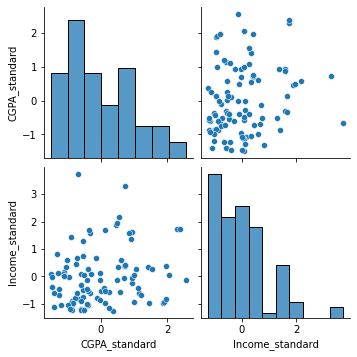

In [13]:
# distribution closer to Normal distribution
sns.pairplot(data=df[['CGPA_standard', 'Income_standard']]);

In [14]:
# verify mean=0 and sd=1 for both columns
print(df['CGPA_standard'].describe(), end='\n\n')
print(df['Income_standard'].describe())

count    1.000000e+02
mean    -3.774758e-17
std      1.005038e+00
min     -1.498460e+00
25%     -7.770923e-01
50%     -3.080867e-01
75%      7.343399e-01
max      2.561205e+00
Name: CGPA_standard, dtype: float64

count    1.000000e+02
mean     8.881784e-18
std      1.005038e+00
min     -1.256946e+00
25%     -7.960170e-01
50%     -1.155981e-01
75%      3.965452e-01
max      3.747425e+00
Name: Income_standard, dtype: float64


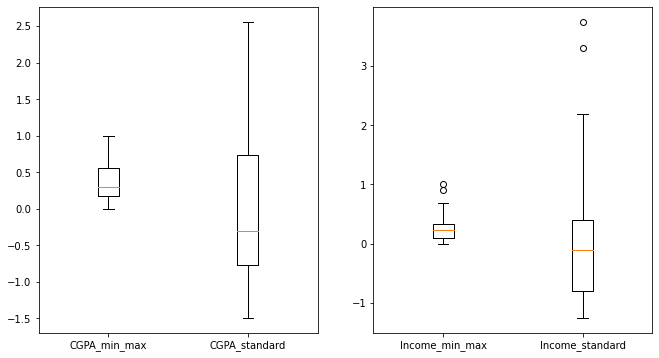

In [15]:
# plot to see the difference between normalization and standardization
cols = ['CGPA', 'Income']
fig, ax = plt.subplots(1, len(cols), figsize=(11, 6))

for i, col in enumerate(cols):
    # Creating plot
    ax[i].boxplot([df[col+'_min_max'], df[col+'_standard']])
    ax[i].set_xticklabels([col+'_min_max', col+'_standard'])

# show plot
plt.show()

In general it cannot be told exactly which scaling method is better, as it depends on the problem so as model use. Therefore it is practically suggested to <b>try both to compare model performances when there is a need for scaling for specific model</b>.

## Categorical Feature
- In real life example there are many categorical features such as district, school name,  marital state, etc, one have to convert them into numerical representations before passing into models.
- If the features is <b>ordinal</b> (has order, e.g. grades A > B > C > D), then can use a mapping to covnert them to sequential numbers like 1, 2, 3, 4 will do the work.
- For <b>non-ordered</b> feature, one popular method is <b>one-hot encoding</b>.
- Both <b>Scikit-learn</b> and <b>Pandas</b> provides ways for encoding, we will demonstrate both here.

### Ordinal Encoding

In [16]:
# randomly generates grades for students
import random
df = pd.DataFrame({
    'Student': np.arange(1, 51),
    'Grade': random.choices(['A', 'B', 'C', 'D', 'E', 'F'], k=50) 
})
df.head()

,Student,Grade
0,1,D
1,2,A
2,3,F
3,4,D
4,5,C


In [17]:
# map to 0 - (n-1) for n categories
enc = preprocessing.OrdinalEncoder()
df['Grade_ordinal'] = enc.fit_transform(df['Grade'].to_numpy().reshape(-1, 1))
df.head()

,Student,Grade,Grade_ordinal
0,1,D,3.0
1,2,A,0.0
2,3,F,5.0
3,4,D,3.0
4,5,C,2.0


### One-hot Encoding

In [18]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]
df = pd.DataFrame(data)
df

,price,rooms,neighborhood
0,850000,4,Queen Anne
1,700000,3,Fremont
2,650000,3,Wallingford
3,600000,2,Fremont


In [19]:
# return an array of matrix
enc = preprocessing.OneHotEncoder()
result = enc.fit_transform(df['neighborhood'].to_numpy().reshape(-1, 1)).toarray()
print(result)
print(enc.categories_[0])

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
['Fremont' 'Queen Anne' 'Wallingford']


In [20]:
# concatenate the result back to the dataframe
df1 = pd.DataFrame(data=result, columns=enc.categories_[0])
pd.concat([df, df1], axis=1)

,price,rooms,neighborhood,Fremont,Queen Anne,Wallingford
0,850000,4,Queen Anne,0.0,1.0,0.0
1,700000,3,Fremont,1.0,0.0,0.0
2,650000,3,Wallingford,0.0,0.0,1.0
3,600000,2,Fremont,1.0,0.0,0.0


In [21]:
# let's do it with pandas, more convenient if you would stick to dataframe in the next step
df1 = pd.get_dummies(df['neighborhood'])
pd.concat([df, df1], axis=1)

,price,rooms,neighborhood,Fremont,Queen Anne,Wallingford
0,850000,4,Queen Anne,0,1,0
1,700000,3,Fremont,1,0,0
2,650000,3,Wallingford,0,0,1
3,600000,2,Fremont,1,0,0


One drawback of using one-hot encoding is that the <b>dimension of data may increase dramatically</b> if the no. of categoires is high, in this case <b>dimensionality reduction</b> technique such as PCA should be applied to remove duplicate features.

## Text Feature
- <b>Natural language processing (NLP)</b> is an important branch of AI which involves processing and analyzing large amount of data involving <b>human languages</b>, e.g. <b>speech recognition, sentiment analysis, named entity recognition (NER), translation, etc.</b>
- To convert text into numerical representatives, the simplest way is to <b>count the occurrences of words</b> in each piece of text.
- Two common methods of counting: <b>count vectorization and TF-IDF</b>

### Count Vectorization
- It involves <b>counting the no. of occurrences of each words (term frequency) appear in a document</b>.
- Every document is encoded to a vector of length n, where n is the total no. of unique words in all documents, each entry in a vector represents the count of a word in that document. 

In [22]:
corpus = ['problem of evil',
          'evil queen',
          'horizon problem']

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
X.toarray()

array([[1, 0, 1, 1, 0],
       [1, 0, 0, 0, 1],
       [0, 1, 0, 1, 0]], dtype=int64)

In [24]:
# how to interpret the sparse matrix
vectorizer.get_feature_names()

['evil', 'horizon', 'of', 'problem', 'queen']

In [25]:
# usually put the transformation back to a dataframe to further processing
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


One problem of count vectorization is that, if a word appears frequently in a document, the term frequency would be much larger than that of other words. If the word is also common across most documents (which means it may not be a distinguishable feature to classify documents), this actually unimportant feature will outweigth the impact of other words.

### TF-IDF (Term Frequency-Inverse Document Frequency)
- An improvement of count vectorization
- It is more useful to know <b>whether a word appears more frequently in one document but not the other</b>.
- <b>TF (Term Frequency)</b> refers to how common a term appears in a document.
- <b>IDF (Inverse Document Frequency)</b> refers to how uncommon a term appears in a document.

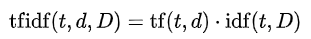

In [26]:
# the basic formula of TF-IDF of a term
display.Image('img/1_tfidf.png')

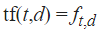

In [27]:
# where tf = raw count of a term in a document
display.Image('img/1_tf.png')

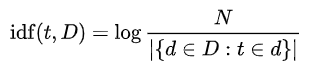

In [28]:
# and idf = log(document frequency/no. of docuemnt that contains the term)
display.Image('img/1_idf.png')

We are going to use the implementation in sklearn to calculate the tfidf of each term, note that the formula used in sklearn is a bit different from the normal textbook one in two ways: <b>an adjusted IDF formula and l2-normalization on each vector</b>.

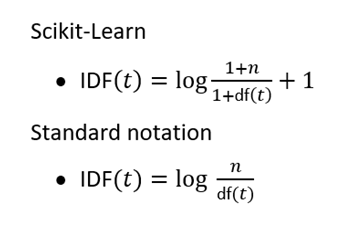

In [29]:
display.Image('img/1_sklearn_idf.png')
# “1” is added to the idf is that terms that occur in all documents in a training set will not be entirely ignored.
# “1” is added to the numerator and denominator of the log term 
# as if an extra document was seen containing every term in the collection exactly once, which prevents zero divisions.

In [30]:
corpus = ['problem of evil',
          'evil queen',
          'horizon problem']

In [31]:
# the default result is normalized, each vector has a unit norm
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer  = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
X.toarray()

array([[0.51785612, 0.        , 0.68091856, 0.51785612, 0.        ],
       [0.60534851, 0.        , 0.        , 0.        , 0.79596054],
       [0.        , 0.79596054, 0.        , 0.60534851, 0.        ]])

In [32]:
# how to interpret the sparse matrix
vectorizer.get_feature_names()

['evil', 'horizon', 'of', 'problem', 'queen']

In [33]:
# usually put the transformation back to a dataframe to further processing
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


In [34]:
import math
def tfidf(t, d, N):
    return t * (1 + math.log((1+N)/(1+d), 2))

You may discover that both the above two statistical methods have a defect: they <b>do not consider the effect of words next to a term so as the sequential order of appearance of words</b>, which could affects the context of a text greatly. Therefore more advanced technique of word embeddings which account for surrounding words of a term, such as <b>Word2Vec, GloVe, BERT</b>, etc, are developed which often rely on neural network.

## Image Feature
- An image is stored in pixels (pixel = pix (picture) + el (element)), in short one could regard a pixel as the smallest element (actually a square box) on a screen.
- E.g. an image of size 180*200 (height x width) means that it consists of 180 x 200 dots 

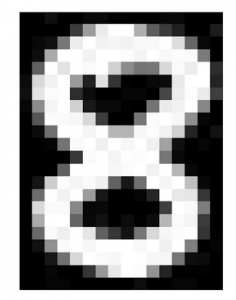

In [35]:
# let's start with a black-white image
display.Image('img/1_black_white.png')

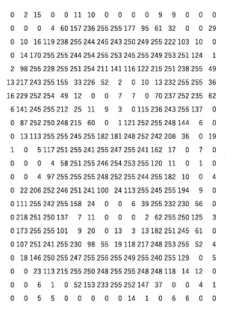

In [36]:
# how a computer stores the above image
# each pixel has a value (pixel value) from 0 to 255 (1 byte for each pixel, 2^8=256), from black to white
display.Image('img/1_machine_img.png')

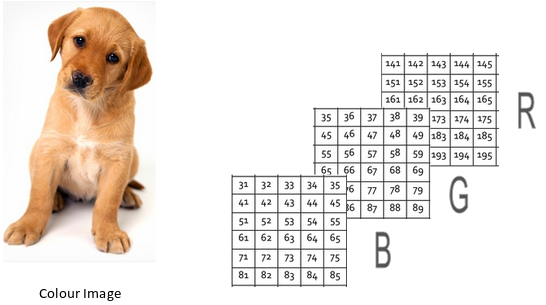

In [37]:
# A colored image consists of three colors, namely Red, Green and Blue. 
# Therefore a RGB image is normally stored as three dimensional matrix, each entry from 0-255
display.Image('img/1_rgb.png')

In [38]:
# We use scikit-image library here for image processing, more info at https://scikit-image.org/
# !{sys.executable} -m pip install scikit-image

In reality, the dimension of an image depends on which <b>format</b> the image is stored, typically there are 3 formats:
- <b>Grayscale</b> (e.g. (420, 310)), one channels, only back and white
- <b>RGB</b> (e.g. (420, 310, 3)), three channels, for three primary colors
- <b>RGBA</b> (e.g. (420, 310, 4)), four channels, including <b>alpha</b> (0-1) controlling opacity of an image, 0=fully transparent and 1=fully opaque

### Transformation
- It is very often to transform an image before extrating features.
- The aim of transformation can be range from <b>extracting information, saving computation space and time to data augmentation  (generating more training data)</b>.
- Common transformations include <b>grayscaling, affine transform (flipping, rotation, translation, scaling), Fourier transform</b>, etc.

### Pixel Feature
- Get the pixel matrix directly as a feature vector

#### For grayscale image

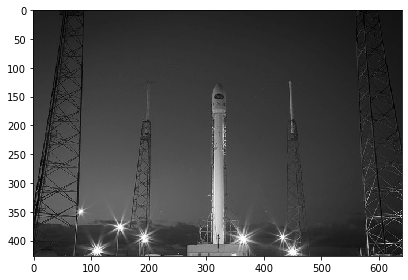

In [39]:
# read and show images
from skimage import data, io
rocket = io.imread('img/1_rocket.png', as_gray=True)
io.imshow(rocket);

In [40]:
rocket.shape, rocket.size

((427, 640), 273280)

In [41]:
# reshape the 3d array to 1d array
features = np.reshape(rocket, rocket.size)
features.shape

(273280,)

#### For RGB image
- Take the mean of three channels

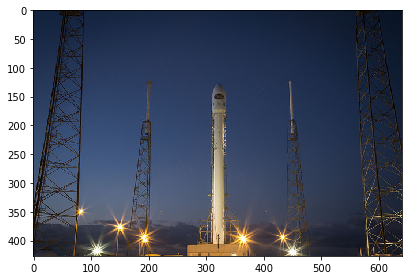

In [42]:
rocket = io.imread('img/1_rocket.png')
io.imshow(rocket);

In [43]:
rocket.shape, rocket.size

((427, 640, 3), 819840)

In [44]:
# new feature matrix containing average pixel value of the three channels
feature_matrix = np.zeros((rocket.shape[0], rocket.shape[1])) 
for i in range(feature_matrix.shape[0]):
    for j in range(feature_matrix.shape[1]):
        feature_matrix[i, j] = np.mean([rocket[i,j,k] for k in range(rocket.shape[2])])

In [45]:
features = np.reshape(feature_matrix, feature_matrix.size) 
features.shape

(273280,)

### Edge Feature
- Edges are the <b>boundaries where the pixel values change drastically</b>. Edge detection use mathematical methods to find discontinuities of image brightness and therefore identifying the boundaries.
- As most of the shape information of an image is enclosed in edges, edge detection helps in pattern recognition, image segmentation (partition an image into multiple segment for easier analysis) and scene analysis.

<ipython-input-46-914e99a2fdd7>:4: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  coins = color.rgb2gray(coins)    # gray scaling


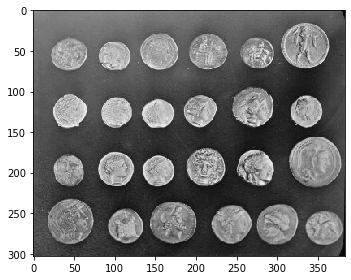

In [46]:
# use another image as an example for edge detection
from skimage import color
coins = data.coins()    # read a built-in image containing coins
coins = color.rgb2gray(coins)    # gray scaling 
io.imshow(coins);

In [47]:
coins.shape, coins.size

((303, 384), 116352)

#### Prewitt Kernel
- A kernel/convolution matrix can be regarded as a small filter for extracting information in small parts of an image.

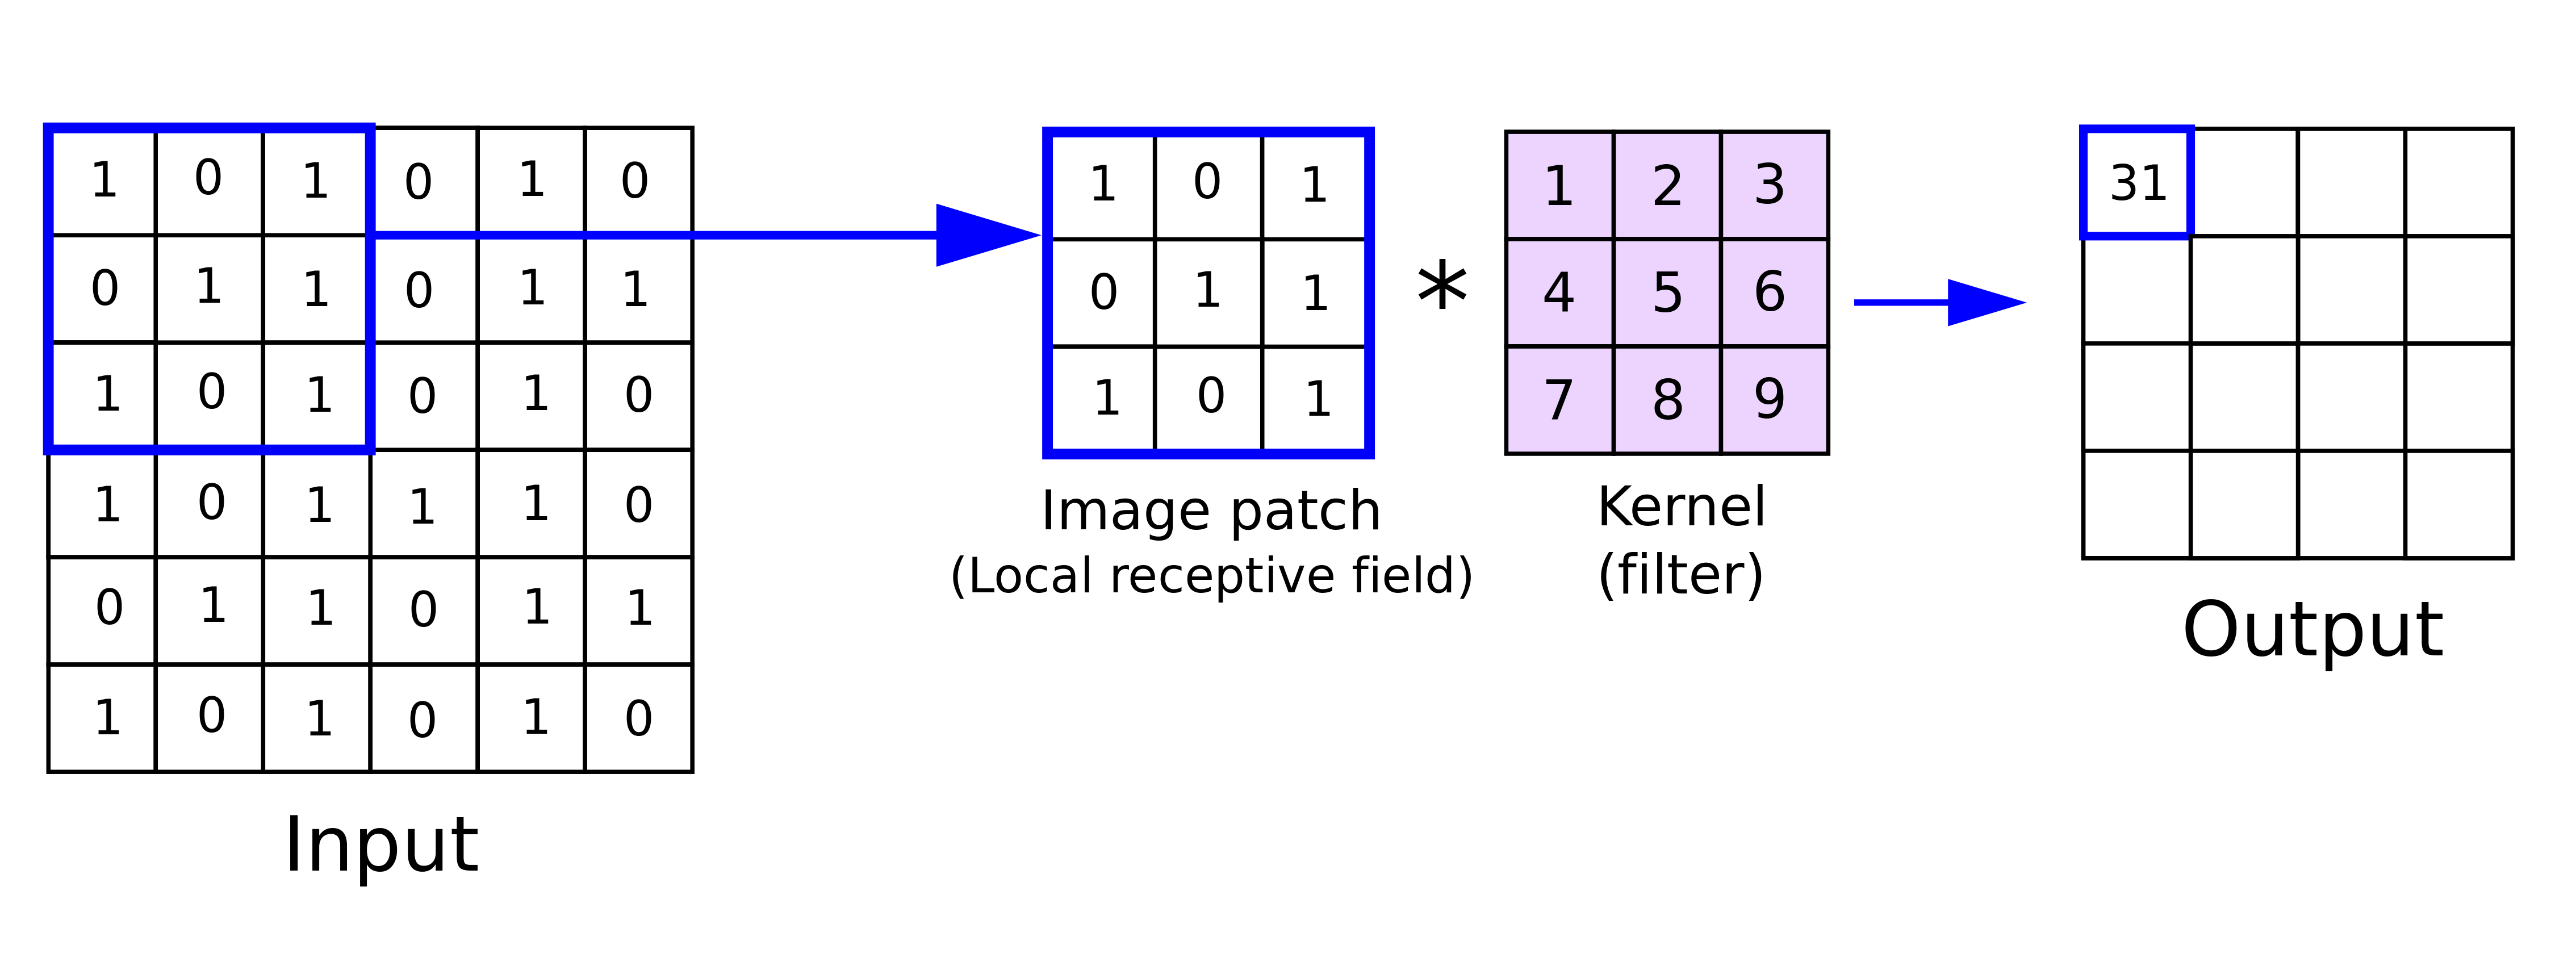

In [48]:
# how a kernel works
# elementwise multiplication followed by aggregation (e.g. sum/average)
display.Image('img/1_kernel.png', width=600)

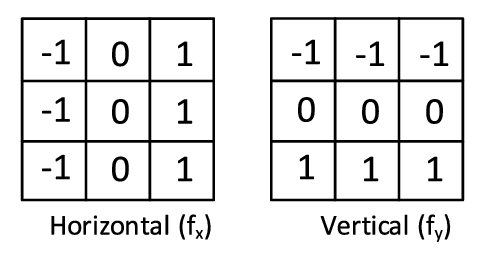

In [49]:
display.Image('img/1_prewitt_kernel.png', width=400)

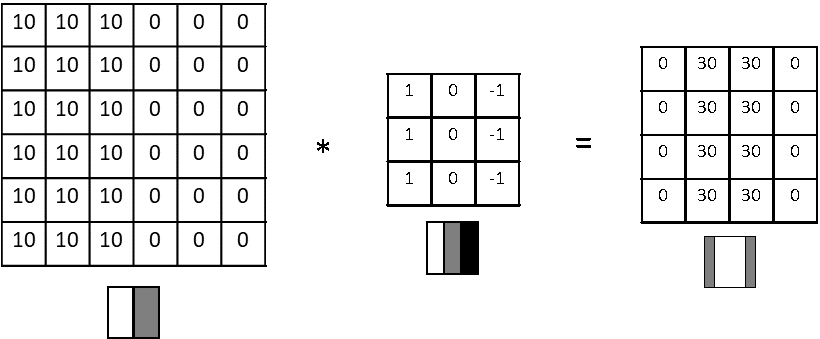

In [50]:
# example of using fx filter to calculate pixel value difference between left and right (horizontal difference)
display.Image('img/1_vertical_edge.png', width=600)

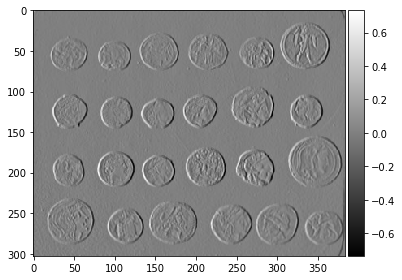

In [51]:
# detect vertical edges
from skimage import filters
pre_ver = filters.prewitt_v(coins) # vertical edge only
io.imshow(pre_ver, cmap='gray');

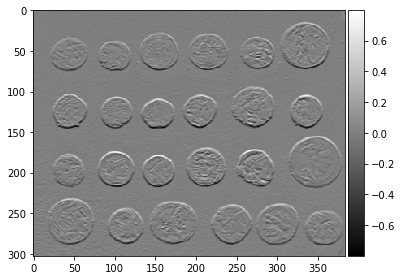

In [52]:
# detect horizontal edges
pre_hor = filters.prewitt_h(coins)
io.imshow(pre_hor, cmap='gray');

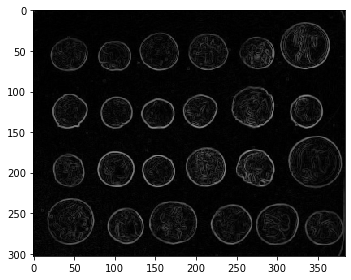

In [53]:
# combine the gradient (change in pixel value) in x and y directions using root-mean square to calculate gradient magnitude
pre1 = np.sqrt(1/2*((pre_hor)**2 + (pre_ver)**2))
io.imshow(pre1, cmap='gray');

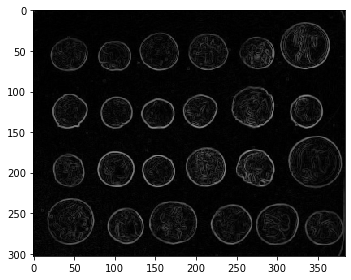

In [54]:
# built-in prewitt function to putting it all together
# the same as above
pre2 = filters.prewitt(coins)
io.imshow(pre2, cmap='gray');

In [55]:
features = np.reshape(pre2, pre2.size) 
features.shape

(116352,)

#### Canny edge detector
- a standard edge detecting multi-stage algorithm, has built-in function in skimage

The five stages include:
1. Smoothing for noise removal.
2. Finding Gradients.
3. None-maximum suppression.
4. Double Thresholding.
5. Edge Tracking by hysteresis.
<br>

More info at https://sbme-tutorials.github.io/2018/cv/notes/4_week4.html#prewitt-operator.

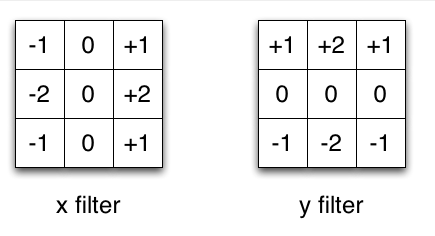

In [56]:
display.Image('img/1_canny_kernel.png', width=400)

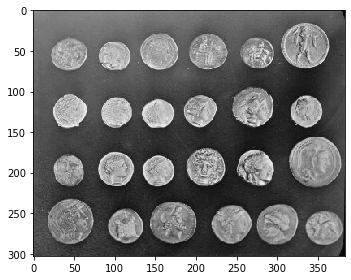

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [57]:
from skimage.feature import canny 
# Apply Canny detector 
coins_edges = canny(coins) 

io.imshow(coins)
plt.show();

io.imshow(coins_edges)
plt.show();

features = np.reshape(coins_edges, coins_edges.size) 
features.shape

# Model Pipeline
- After several steps of transformation made in feature engineering and handling missing data, we would like to put all the steps together sequentially as a pipeline for convenience.
- <b>Sklearn</b> provides a pipeline function to do the job.

In [ ]:
display.Image('img/1_pipeline.png', width=600)

In [ ]:
# an example of feature matrix X and target y with missing values as nan
# let's make a pipeline which fill in the missing values by mean of a column
from numpy import nan
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

In [ ]:
# feature matrix and target vector, actually similar to a dataframe of dataset we saw before
display.Image('img/1_features_target.png', width=500)

In [ ]:
# when we do it separately
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
X1 = imp.fit_transform(X)
X1

In [ ]:
# generate polynomial features from the original features
# For example, if an input sample is two dimensional and of the form [a, b], 
# the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X2 = poly.fit_transform(X1)
print(X2)

In [ ]:
# train and test a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X2, y)    # train the model
X_ = np.array([[1, 7, nan], [4, 7, 3]])
X_1 = imp.transform(X_)
X_2 = poly.transform(X_1)
model.predict(X_2)

In [ ]:
# putting it all together into a pipeline for both training and testing
from sklearn.pipeline import make_pipeline
model = make_pipeline(SimpleImputer(strategy='mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression())
model.fit(X, y)    # train the model
model.predict(X_)    # should be the same result as above

In the coming lessons, we will go through many classic supervised and unsupervised ML algorithms in both theoretical and applicational aspects. The course will follow several examples from Python Data Science Handbook by Jake VanderPlas combined with information from various documentations (sklearn, imblearn, ray) and open resources (Kaggle, Geeks for Geeks, Analytics Vidhya, etc). For a deeper understanding on the mathematics behind those algorithms, I strongly advise one to go through the Machine Learning MOOC by Andrew Ng which provides more detailed discussion on formulation of the optimization problem in each algorithm.